In [0]:
# we will  be testing the accuracy of our models using logit, decision trees, random forests, knearest neighbour. 


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

In [0]:
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

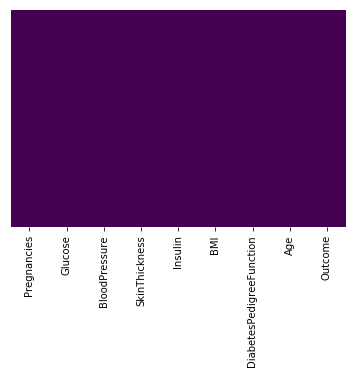

In [0]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap ='viridis')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


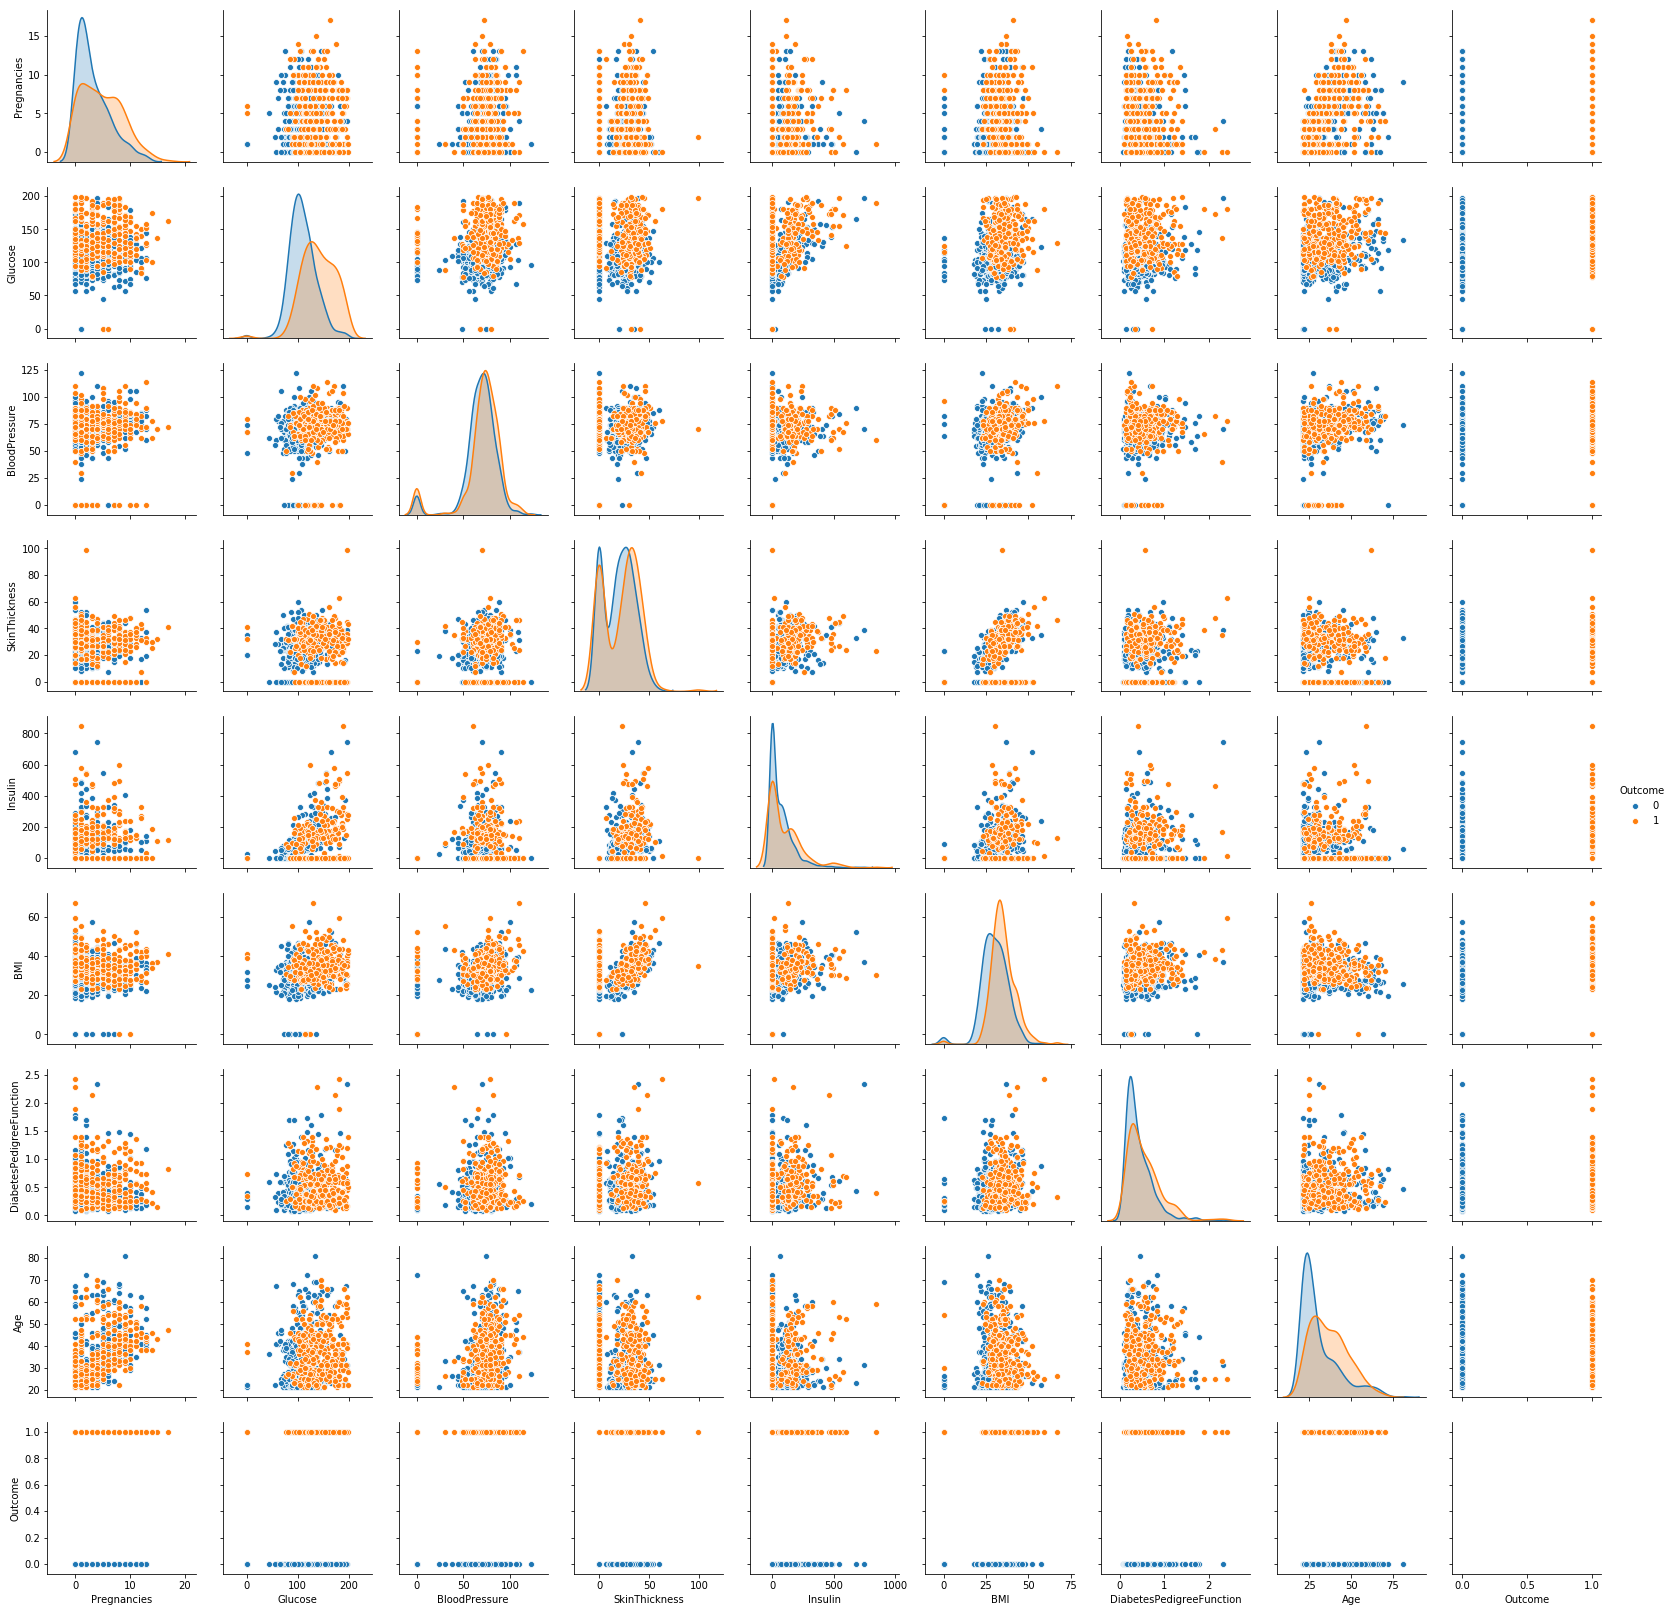

In [0]:
sns.pairplot(df,hue = 'Outcome')

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [0]:


#features
feature_cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age','BloodPressure']
X = df[feature_cols]
Y = df.Outcome

In [0]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
LOGREG = LogisticRegression()
LOGREG.fit(X_train,y_train)
y_pred=LOGREG.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

confusion_matrix 

array([[119,  11],
       [ 26,  36]])

In [0]:
metrics.accuracy_score(y_test, y_pred)

0.8072916666666666

In [0]:
from sklearn.tree import DecisionTreeClassifier  

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [0]:
DTClassify = DecisionTreeClassifier()
DTClassify = DTClassify.fit(X_train,y_train)
y_pred = DTClassify.predict(X_test)


In [0]:
metrics.accuracy_score(y_test, y_pred)

0.7922077922077922

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

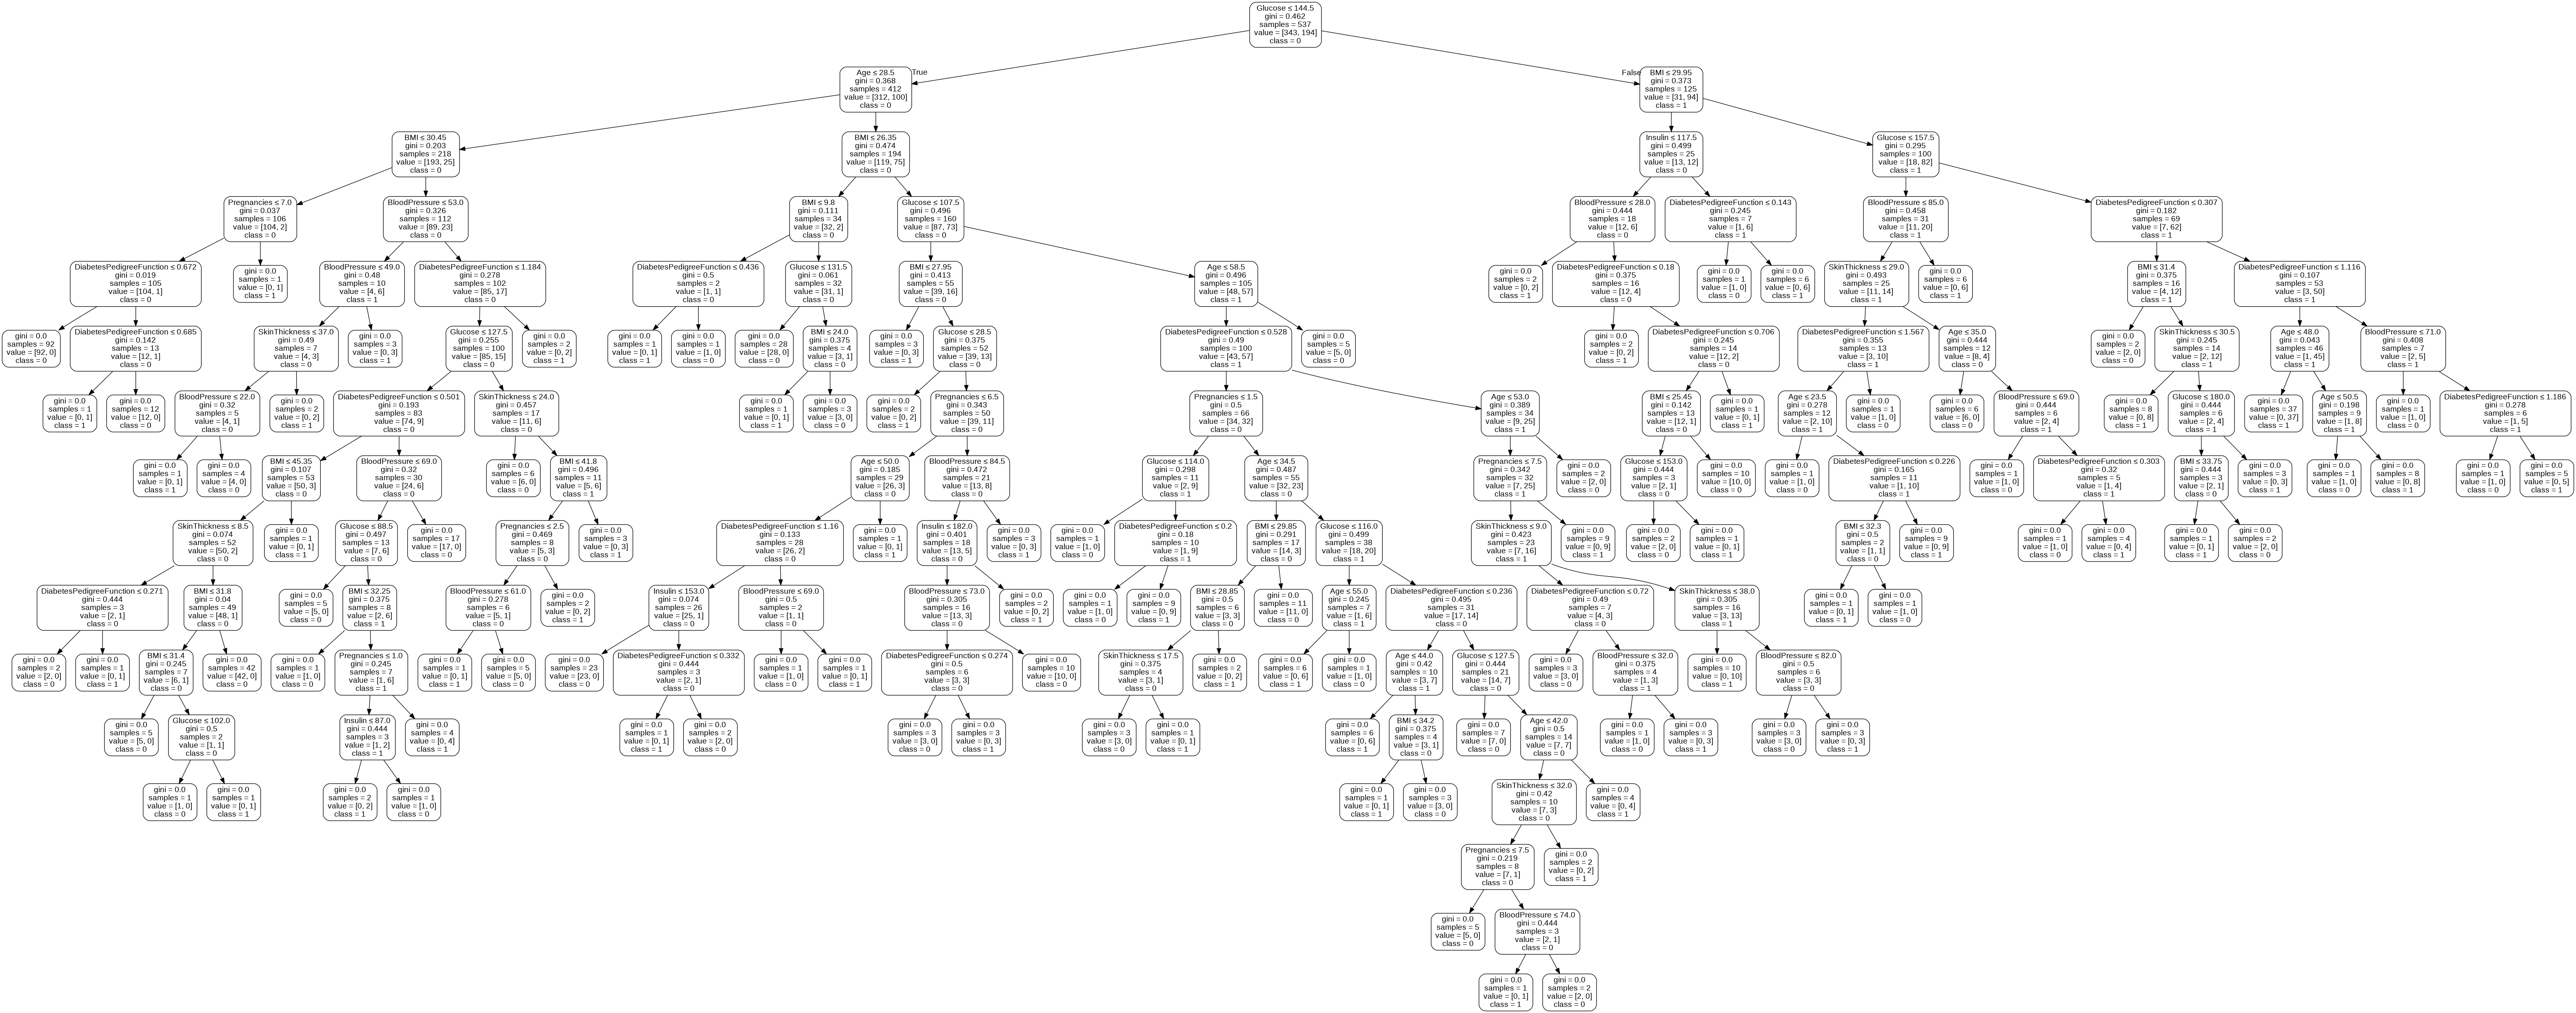

In [0]:
dot_data = StringIO()
export_graphviz(DTClassify, out_file=dot_data,  
                filled=False, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_tree.png')
Image(graph.create_png())

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
Randomforest=RandomForestClassifier(n_estimators=100)
Randomforest.fit(X_train,y_train)

y_pred=Randomforest.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8311688311688312

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis = 1))
scaledfeatures = scaler.transform(df.drop('Outcome',axis = 1))
df_feat = pd.DataFrame(scaledfeatures,columns = df.columns[:-1])
df_feat.head()
#refer to the sns.pairplot above for analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [0]:

X_train,X_test,y_train,y_test=train_test_split(scaledfeatures,df['Outcome'],test_size=0.2,random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred = KNN.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test,pred))

[[88 19]
 [24 23]]


In [0]:
print(classification_report(y_test,pred))

#data will underfit when k value is just 1

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.55      0.49      0.52        47

    accuracy                           0.72       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.71      0.72      0.72       154



In [0]:
#choosing k value for our model
#accuracy = []
#for i in range(1,40):
#  KNN = KNeighborsClassifier(n_neighbors=i)
#  Score = cross_val_score(KNN,dffeatures,df['Outcome'],cv = 10)
#  accuracy.append(Score.mean())




error = []
for i in range(1,40):
  KNN = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(KNN,df_feat,df['Outcome'],cv = 10)
  error.append(1-score.mean())

Text(0, 0.5, 'Error rate')

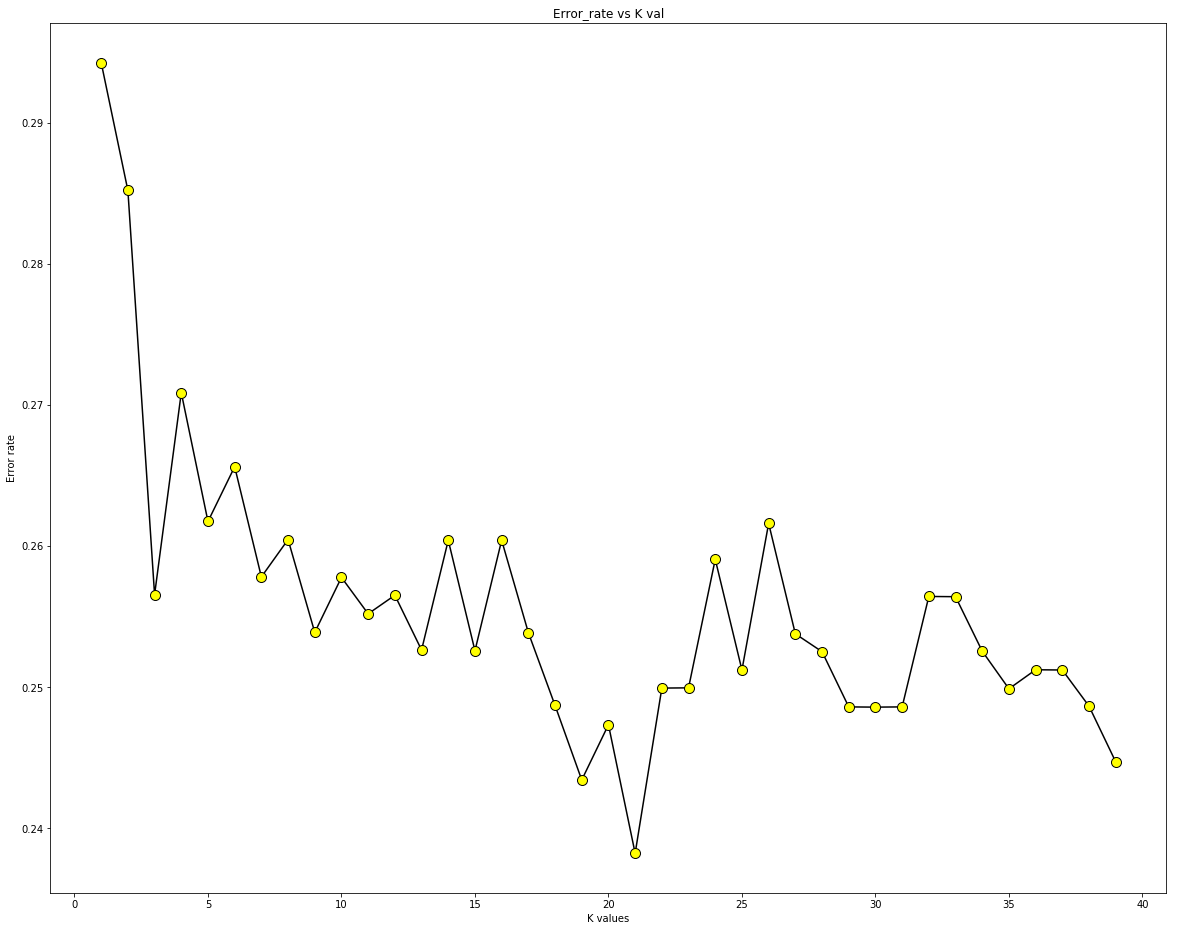

In [0]:
plt.figure(figsize = (20,16))
plt.plot(range(1,40),error,color = 'black',marker = 'o',markerfacecolor = 'yellow',markersize = 10)
plt.title('Error_rate vs K val')
plt.xlabel('K values')
plt.ylabel('Error rate')


In [0]:
X_train,X_test,y_train,y_test=train_test_split(scaledfeatures,df['Outcome'],test_size=0.2,random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 15)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [0]:
pred = KNN.predict(X_test)

In [0]:
print(confusion_matrix(y_test,pred))

[[95 12]
 [17 30]]


In [0]:
print(classification_report(y_test,pred))
#here we drastically increased accuracy from 72% to 81%

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154

